In [62]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

In [63]:
#set device
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else: 
  device = torch.device('cpu')

In [64]:
#download dataset from torchvision
train_dataset = torchvision.datasets.MNIST(root='./data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data/', train=False, transform=transforms.ToTensor())
categoryNames = ['one','two','three','four','five','six','seven','eight','nine']

In [65]:
#set learning rate, batch size, and epochs
learningRate = 0.001
batchSize = 100
numEpochs = 5

In [66]:
#initialize data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batchSize, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batchSize, 
                                          shuffle=False)

In [87]:
len(train_dataset)

10000

In [68]:
#funciton for printing and image from the Tensor data
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    return plt

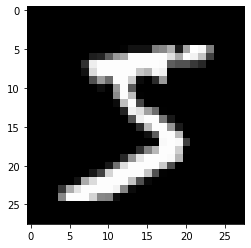

In [86]:
gen_image(train_dataset[0][0].numpy()[0]).show()

In [80]:
#define conv net class
class ConvNet(nn.Module):
    def __init__(self, numCategories=10): 
        super(ConvNet, self).__init__() #inherit info from parent class
        #first sequential hidden layer
        #combines convolution, ReLU and max pooling
        self.layer1 = nn.Sequential(
              nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
              nn.BatchNorm2d(num_features=16),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2, stride=2))
        #second sequential hidden layer
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        #output layer
        self.fc = nn.Linear(7*7*32, numCategories)
        
    def forward(self, x):
        out = self.layer1(x);
        out = self.layer2(out);
        out = out.reshape(out.size(0), -1);
        out = self.fc(out);
        return out

In [81]:
model = ConvNet(10).to(device)

In [82]:
#optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
loss_func = nn.CrossEntropyLoss()

In [84]:
#train model
numSteps = len(train_loader)
for epoch in range(numEpochs):
    for i, (image, label) in enumerate(train_loader):
        image = image.to(device)
        label = label.to(device)
        
        #forward
        outputs = model(image)
        loss = loss_func(outputs, label)
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if ((i + 1) % 100) == 0:
          print ('Epoch: [%d/%d]; batchStep = [%d/%d]; Loss: %.4f.'%(epoch+1, numEpochs, i + 1, numSteps, loss.item()))
        

Epoch: [1/5]; batchStep = [100/600]; Loss: 0.1161.
Epoch: [1/5]; batchStep = [200/600]; Loss: 0.0512.
Epoch: [1/5]; batchStep = [300/600]; Loss: 0.0294.
Epoch: [1/5]; batchStep = [400/600]; Loss: 0.0270.
Epoch: [1/5]; batchStep = [500/600]; Loss: 0.2006.
Epoch: [1/5]; batchStep = [600/600]; Loss: 0.0445.
Epoch: [2/5]; batchStep = [100/600]; Loss: 0.0153.
Epoch: [2/5]; batchStep = [200/600]; Loss: 0.0442.
Epoch: [2/5]; batchStep = [300/600]; Loss: 0.0290.
Epoch: [2/5]; batchStep = [400/600]; Loss: 0.0835.
Epoch: [2/5]; batchStep = [500/600]; Loss: 0.1118.
Epoch: [2/5]; batchStep = [600/600]; Loss: 0.0267.
Epoch: [3/5]; batchStep = [100/600]; Loss: 0.0074.
Epoch: [3/5]; batchStep = [200/600]; Loss: 0.0199.
Epoch: [3/5]; batchStep = [300/600]; Loss: 0.0311.
Epoch: [3/5]; batchStep = [400/600]; Loss: 0.0212.
Epoch: [3/5]; batchStep = [500/600]; Loss: 0.0551.
Epoch: [3/5]; batchStep = [600/600]; Loss: 0.0226.
Epoch: [4/5]; batchStep = [100/600]; Loss: 0.0107.
Epoch: [4/5]; batchStep = [200/

In [85]:
#test model
total = 0
correct = 0

for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum().item()

print(correct/total)
                    

98.99
